<a href="https://colab.research.google.com/github/hiydavid/tfdev_learning/blob/main/ZTM/notebooks/tfdev_01_neural_network_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01: Neural Network Regression

In this notebook we're going to cover:
* Architecture of a neural network regression model
* The input shapes and output shapes of a regression mode (features and labels)
* Creating custom data to view and fit
* Steps in modeling: creating a model, compiling a model, fitting a model, evaluating a model
* Different evaluation methods
* Saving and loading models

# Creating Sample Regression Data

In [ ]:
# import tensorflow
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.8.0


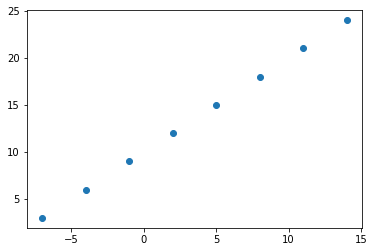

In [ ]:
# create features & labels
X = np.array([-7., -4., -1., 2., 5., 8., 11., 14.])
y = np.array([3., 6., 9., 12., 15., 18., 21., 24.])
plt.scatter(X, y);

In [ ]:
# turn data into tensors
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)

X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

# Steps in Modeling with TensorFlow

1. **Creating a model**: define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model**: define the loss function (which tells our model how wrong it is), the optimizer (how to improve the pattern it is learning), and the evaluation metrics (how is our model performing).
3. **Fitting a model**: letting the model try to find patterns between X & y (features and labels).


In [ ]:
# set random seed
tf.random.set_seed(42)

In [ ]:
# use sample data to buiild, compile, and fit
tf.keras.backend.clear_session()

model_0 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_0.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)

model_0.fit(tf.expand_dims(X, axis=1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 276ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 9ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 7ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 8ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 6ms/step - loss: 10.9748 - mae: 10.9748


In [ ]:
# try and make prediction (the right answer is 27)
y_pred = model_0.predict([17.0])
y_pred

array([[12.716021]], dtype=float32)

# Improving a TensorFlow Model

1. **When creating a model**: here we might add more **layers**, increase the number of **neurons**, change the **activation function** of each layer.
2. **When compiling a model**: here we might change the **optimizer**, change the **learning rate** of the optimizer.
3. **When fitting a model**: here we might fit a model for more **epochs**, or on more **data** to learn from.

In [ ]:
# experiment 1: expand number of epochs
tf.keras.backend.clear_session()

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)

model_1.fit(tf.expand_dims(X, axis=1), y, epochs=100, verbose=1)

Epoch 1/100
1/1 [==============================] - 1s 745ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 16ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 13ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 14ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 14ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] -

In [ ]:
# now check the prediction (the right answer is 27)
y_pred = model_1.predict([17.])
y_pred

array([[29.739855]], dtype=float32)

In [ ]:
# experiment 2: add a hidden layer
tf.keras.backend.clear_session()

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

model_2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)

model_2.fit(tf.expand_dims(X, axis=1), y, epochs=100, verbose=1)

Epoch 1/100
1/1 [==============================] - 1s 711ms/step - loss: 12.3193 - mae: 12.3193
Epoch 2/100
1/1 [==============================] - 0s 14ms/step - loss: 11.7804 - mae: 11.7804
Epoch 3/100
1/1 [==============================] - 0s 19ms/step - loss: 11.2324 - mae: 11.2324
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 10.6601 - mae: 10.6601
Epoch 5/100
1/1 [==============================] - 0s 13ms/step - loss: 10.0632 - mae: 10.0632
Epoch 6/100
1/1 [==============================] - 0s 13ms/step - loss: 9.4503 - mae: 9.4503
Epoch 7/100
1/1 [==============================] - 0s 31ms/step - loss: 8.7991 - mae: 8.7991
Epoch 8/100
1/1 [==============================] - 0s 15ms/step - loss: 8.1072 - mae: 8.1072
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 7.3691 - mae: 7.3691
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 6.5758 - mae: 6.5758
Epoch 11/100
1/1 [==============================] - 0s 10ms

In [ ]:
# now predict again (the right answer is 27)
y_pred = model_2.predict([17.])
y_pred

array([[31.223137]], dtype=float32)

In [ ]:
# experiment 3: change the optimizer
tf.keras.backend.clear_session()

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

model_3.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['mae']
)

model_3.fit(tf.expand_dims(X, axis=1), y, epochs=100, verbose=1)

Epoch 1/100
1/1 [==============================] - 1s 639ms/step - loss: 12.7339 - mae: 12.7339
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 11.9052 - mae: 11.9052
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 11.0712 - mae: 11.0712
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 10.2556 - mae: 10.2556
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 9.6071 - mae: 9.6071
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 8.9779 - mae: 8.9779
Epoch 7/100
1/1 [==============================] - 0s 13ms/step - loss: 8.3324 - mae: 8.3324
Epoch 8/100
1/1 [==============================] - 0s 16ms/step - loss: 7.6675 - mae: 7.6675
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 6.9773 - mae: 6.9773
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 6.2578 - mae: 6.2578
Epoch 11/100
1/1 [==============================] - 0s 25ms/s

In [ ]:
# now predict again (the right answer is 27)
y_pred = model_3.predict([17.])
y_pred

array([[26.43606]], dtype=float32)

# Evaluating a TensorFlow Model

* **Visualize the data**: what data are we working with? What does it look like?
* **Visualize the model**: what does the model look like?
* **Visualize the training**: how does the model perform while it learns?
* **Visualize the predictions**: how do the predictions line up against the ground truth?

In [ ]:
# make a bigger dataset
X = tf.range(-100, 100, 4)
y = X + 10 # formula we want the model to learn
X, y

(<tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96], dtype=int32)>,
 <tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

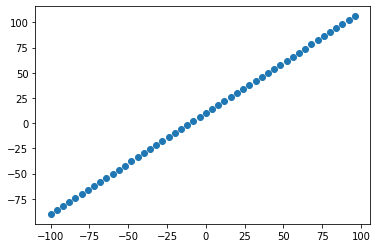

In [ ]:
# visualize the data
plt.scatter(X, y)

In [ ]:
# split X and y into training & test set
X_train = X[:40]
X_test = X[40:]

y_train = y[:40]
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

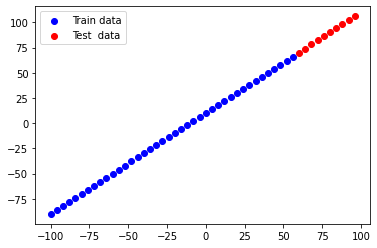

In [ ]:
# visualize training & test data
plt.scatter(X_train, y_train, c='b', label='Train data')
plt.scatter(X_test, y_test, c='r', label='Test  data')
plt.legend()
plt.show()

In [ ]:
# visualize the model
# must specfiy input shape in order to view model summary without fitting
tf.keras.backend.clear_session()

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
